In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
# modify "customized_path_to_homework", path of folder in drive, where you uploaded your homework
customized_path_to_homework = "/content/drive/Shareddrives/thesis"
sys.path.append(customized_path_to_homework)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import spearmanr
import numpy as np
from sklearn.linear_model import LinearRegression

from scipy.stats import linregress

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
origin = pd.read_excel("/content/drive/Shareddrives/thesis/C_Project4_Origin.xlsx")
# piazza = pd.read_excel("/content/drive/Shareddrives/thesis/Piazza contribution.xlsx")

In [5]:
less_85 = origin[origin['TG'] < 80]
above_85 = origin[origin['TG'] >= 80]

In [6]:
filterAbove85 = above_85
filterLess85 = less_85
filterAbove85_temp = above_85[(above_85["Max Sub"] > 10) & (above_85["Correctness by thirdsubmission"] < 0.5) ]
filterLess85_temp = less_85
filtered_temp = pd.concat([filterAbove85_temp, filterLess85_temp])

In [7]:
filteredAbove85_Numvisit_4 = above_85[(above_85['NumVisit'] == 0) & (above_85['online'] == 0)]

filterAbove85_4 = above_85[(above_85['NumVisit'] > 0)& (above_85['online'] > 0) & (above_85["Max Sub"] > 9) & (above_85["Correctness by thirdsubmission"] <= 0.5)]
filterLess85_4 = less_85
filterNonVisit4 = filteredAbove85_Numvisit_4[(filteredAbove85_Numvisit_4["Max Sub"] > 9) & (filteredAbove85_Numvisit_4["Correctness by thirdsubmission"] <= 0.5) & (filteredAbove85_Numvisit_4["NumberOfDays"] > 3)]
filtered4 = pd.concat([filterAbove85_4, filterLess85_4, filterNonVisit4])

In [8]:
#correlation

In [29]:
# spearman correlation for struggling student project performance vs number of office hour visits
coef,p = spearmanr(filtered_temp.NumVisit,filtered_temp.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)
linregress(filtered_temp.NumVisit, filtered_temp.TG)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.313


LinregressResult(slope=0.48509510723285726, intercept=76.14607905906574, rvalue=0.2700489269352755, pvalue=6.538788681645605e-05, stderr=0.11906944033932385)

In [28]:
# spearman correlation for original student project performance vs number of office hour visits
coef,p = spearmanr(origin.NumVisit,origin.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)
linregress(origin.NumVisit, origin.TG)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.079


LinregressResult(slope=0.22490906949856634, intercept=86.41006014567915, rvalue=0.11666986052989671, pvalue=0.009817786087657938, stderr=0.08675764029142165)

In [11]:
# spearman correlation struggling project performance vs number Project 4 related post view on Piazza
coef,p = spearmanr(filtered_temp.view,filtered_temp.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)
linregress(filtered_temp.view, filtered_temp.TG)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.412


LinregressResult(slope=0.21934367901892604, intercept=73.94645623695382, rvalue=0.35800252996126647, pvalue=7.73143232007777e-08, stderr=0.03938353979477774)

In [12]:
# spearman correlation for original project performance vs number Project 4 related post view on Piazza
coef,p = spearmanr(origin.view,origin.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)
linregress(origin.view, origin.TG)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.285


LinregressResult(slope=0.12221575284095498, intercept=84.80505637468426, rvalue=0.21717685155232952, pvalue=1.245868635884644e-06, stderr=0.024891888434532626)

In [13]:
#getting students who did not struggle project 4
def GetDifferences(df1, df2):
  df = pd.concat([df1, df2]).reset_index(drop=True)
  idx = [diff[0] for diff in df.groupby(list(df.columns)).groups.values() if len(diff) == 1]
  return df.reindex(idx)

In [30]:
#Removing weird students
filtered4_remove = filtered_temp[(filtered_temp["NumVisit"] < 55) ]
Maybe = GetDifferences(origin, filtered_temp)

In [31]:
temp = GetDifferences(filtered_temp, filtered4)

75.65140692899992

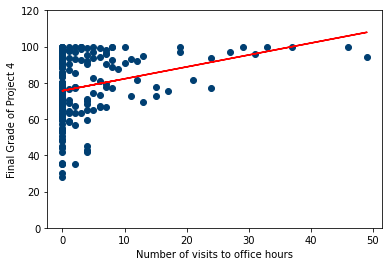

In [32]:
ox = filtered4_remove.NumVisit
oy = filtered4_remove.TG
plt.scatter(ox,oy,color='#003F72')
m, b = np.polyfit(ox, oy, 1)
plt.ylim(0,120)
plt.plot(ox, m*ox+b, color = 'red')
plt.xlabel("Number of visits to office hours")
plt.ylabel("Final Grade of Project 4")
rsquare = r2_score(oy,ox)
b

93.94929245712677

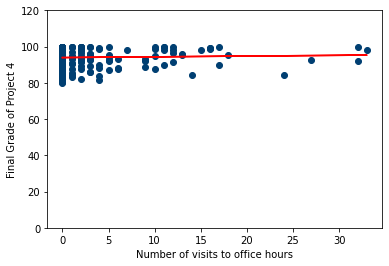

In [33]:
ox = Maybe.NumVisit
oy = Maybe.TG
plt.scatter(ox,oy,color='#003F72')
m, b = np.polyfit(ox, oy, 1)
plt.ylim(0,120)
plt.plot(ox, m*ox+b, color = 'red')
plt.xlabel("Number of visits to office hours")
plt.ylabel("Final Grade of Project 4")
rsquare = r2_score(oy,ox)
b

73.84240598993617

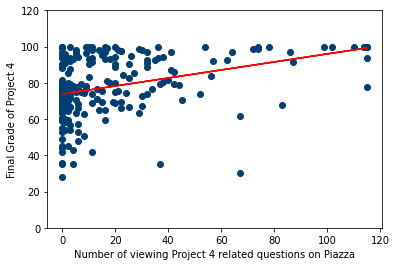

In [34]:
ox = filtered4_remove.view
oy = filtered4_remove.TG
plt.scatter(ox,oy,color='#003F72')
m, b = np.polyfit(ox, oy, 1)
plt.ylim(0,120)
plt.plot(ox, m*ox+b, color = 'red')
plt.xlabel("Number of viewing Project 4 related questions on Piazza")
plt.ylabel("Final Grade of Project 4")
rsquare = r2_score(oy,ox)
b

93.5789268894072

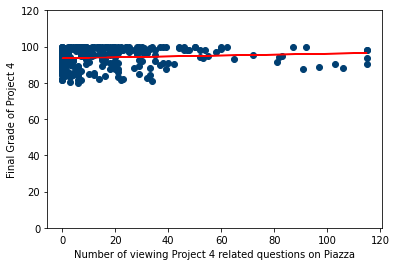

In [35]:
ox = Maybe.view
oy = Maybe.TG
plt.scatter(ox,oy,color='#003F72')
m, b = np.polyfit(ox, oy, 1)
plt.ylim(0,120)
plt.plot(ox, m*ox+b, color = 'red')
plt.xlabel("Number of viewing Project 4 related questions on Piazza")
plt.ylabel("Final Grade of Project 4")
rsquare = r2_score(oy,ox)
b

Linear regression calculation for Project performance 4 and help-seeking behavior.

In [45]:
#linear regression calculation on original student dataset with Project 4 performance vs number of office hour visits
linregress(origin.NumVisit,origin.TG)

LinregressResult(slope=0.22490906949856634, intercept=86.41006014567915, rvalue=0.11666986052989671, pvalue=0.009817786087657938, stderr=0.08675764029142165)

In [46]:
#linear regression calculation on struggling student data set with Project 4 performance vs number of visits to office hour.
linregress(filtered_temp.NumVisit,filtered_temp.TG)

LinregressResult(slope=0.48509510723285726, intercept=76.14607905906574, rvalue=0.2700489269352755, pvalue=6.538788681645605e-05, stderr=0.11906944033932385)

In [47]:
#linear regression calculation on non-struggling student data set with Project 4 performance vs number of visits to office hour.
linregress(Maybe.NumVisit,Maybe.TG)

LinregressResult(slope=0.04106686687981699, intercept=93.94929245712679, rvalue=0.039304551163076164, pvalue=0.5155216612469726, stderr=0.0630721635828715)

In [48]:
#linear regression calculation on original student dataset with Project 4 performance vs number of visits to office hour.
linregress(origin.view,origin.TG)

LinregressResult(slope=0.12221575284095498, intercept=84.80505637468426, rvalue=0.21717685155232952, pvalue=1.245868635884644e-06, stderr=0.024891888434532626)

In [51]:
#linear regression calculation on struggling student data set with Project 4 performance vs number Project 4 related post view on Piazza.
linregress(filtered_temp.view,filtered_temp.TG)

LinregressResult(slope=0.21934367901892604, intercept=73.94645623695382, rvalue=0.35800252996126647, pvalue=7.73143232007777e-08, stderr=0.03938353979477774)

In [52]:
#linear regression calculation on non-struggling student data set with Project 4 performance vs number Project 4 related post view on Piazza.
linregress(Maybe.view,Maybe.TG)

LinregressResult(slope=0.024970043285861776, intercept=93.5789268894072, rvalue=0.10612525350396682, pvalue=0.07839813833760516, stderr=0.014134021932479798)

In [53]:
# spearman correlation for non-struggling with Project 4 performance vs number of office hour visits
coef,p = spearmanr(Maybe.NumVisit,Maybe.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)
linregress(Maybe.NumVisit, Maybe.TG)

Spearmans correlation coefficient overall help-seeking activity vs grade: -0.022


LinregressResult(slope=0.04106686687981699, intercept=93.94929245712679, rvalue=0.039304551163076164, pvalue=0.5155216612469726, stderr=0.0630721635828715)

In [54]:
# spearman correlation for non-struggling with Project 4 performance vs number Project 4 related post view on Piazza
coef,p = spearmanr(Maybe.view,Maybe.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)
linregress(Maybe.view, Maybe.TG)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.165


LinregressResult(slope=0.024970043285861776, intercept=93.5789268894072, rvalue=0.10612525350396682, pvalue=0.07839813833760516, stderr=0.014134021932479798)